<div dir="rtl" align="center">
<font face="XB Zar" size=5>
    <font face="IranNastaliq" size=5>
      به نام خدا
    </font>
    <br>
    <font size=3>
      دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
    </font>
    <br>
    <font color=blue size=5>
      سیگنال‌ها و سیستم‌ها
    </font>
    <br>
    <hr/>
    <font color=red size=6>
      تمرین عملی
    </font>
    <br>
پارسا حسینی ۹۸۱۰۹۵۸۳
    <hr>
</font>
</div>

In [1]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 KB 8.0 MB/s eta 0:00:00


In [2]:
from IPython.display import Audio
import numpy as np
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, fftfreq, ifft, fftshift
import control
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = '/content/drive/MyDrive/Signal_PHW'
%cd {path}

/content/drive/MyDrive/Signal_PHW


<div dir=rtl id="intro">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        سوال اول
      </font>
      <hr />
</font>
</div>

In [4]:
Audio('music1.wav')

In [5]:
Audio('music2.wav')

In [6]:
sample_rate1, data1 = wavfile.read("music1.wav")
sample_rate2, data2 = wavfile.read("music2.wav")
length1 = data1.shape[0] / sample_rate1
length2 = data2.shape[0] / sample_rate2
print(f"Sample rate 1: {sample_rate1}", end=' ')
print(f"Shape 1: {data1.shape[0]}", end=' ')
print(f"Length 1: {length1}s")
print(f"Sample rate 2: {sample_rate2}", end= ' ')
print(f"Shape 2: {data2.shape[0]}", end=' ')
print(f"Length 2: {length2}s")
data1, data2

Sample rate 1: 22050 Shape 1: 200000 Length 1: 9.070294784580499s
Sample rate 2: 22050 Shape 2: 200000 Length 2: 9.070294784580499s


(array([1090, 1548, 1360, ..., 1746, 1856, 1638], dtype=int16),
 array([ -1,   0,   0, ..., 131, 209, 232], dtype=int16))

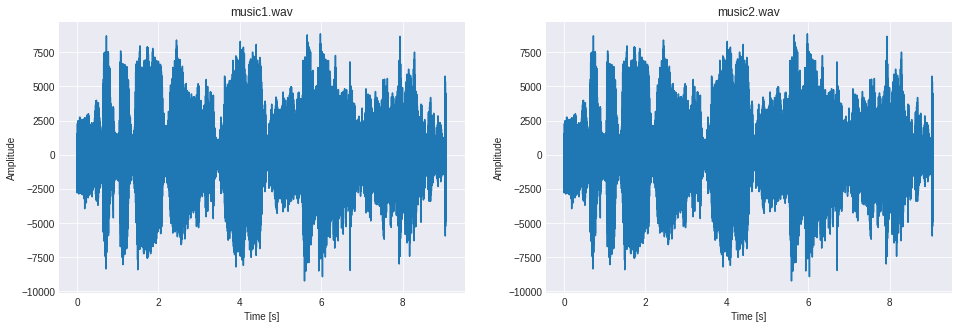

In [7]:
fig, axes = plt.subplots(figsize=(16,5), nrows=1, ncols=2)

def plot_time_domain(data, length, axe, label):
    time = np.linspace(0., length, data.shape[0])
    axe.plot(time, data)
    axe.set_title(label)
    axe.set_xlabel("Time [s]")
    axe.set_ylabel("Amplitude")

plot_time_domain(data1, length1, axes[0], label='music1.wav')
plot_time_domain(data1, length1, axes[1], label='music2.wav')
plt.show()

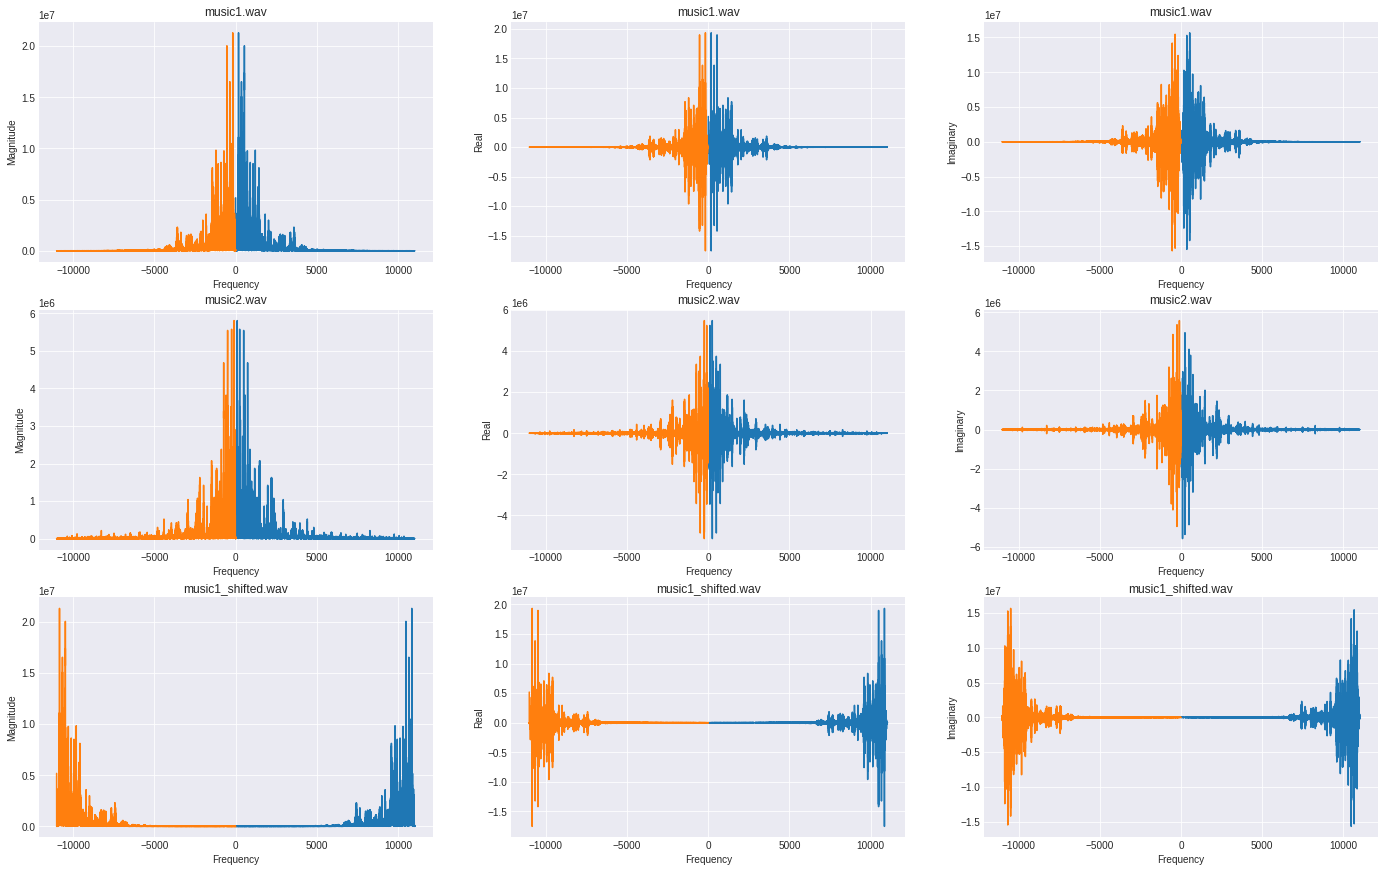

In [8]:
# FFT
yf1 = fft(data1)
xf1 = fftfreq(data1.shape[0], 1 / sample_rate1)
yf1_shifted = fftshift(yf1)
yf2 = fft(data2)
xf2 = fftfreq(data2.shape[0], 1 / sample_rate2)

fig, axes = plt.subplots(figsize=(24,15), nrows=3, ncols=3)
def plot_freq_domain(xf, yf, axe, label):
    axe[0].plot(xf[:len(xf)//2], np.abs(yf)[:len(xf)//2])
    axe[0].plot(xf[len(xf)//2:], np.abs(yf)[len(xf)//2:])
    axe[0].set_title(label)
    axe[0].set_ylabel('Magnitude')
    axe[0].set_xlabel("Frequency")
    axe[1].plot(xf[:len(xf)//2], np.real(yf)[:len(xf)//2])
    axe[1].plot(xf[len(xf)//2:], np.real(yf)[len(xf)//2:])
    axe[1].set_title(label)
    axe[1].set_ylabel('Real')
    axe[1].set_xlabel("Frequency")
    axe[2].plot(xf[:len(xf)//2], np.imag(yf)[:len(xf)//2])
    axe[2].plot(xf[len(xf)//2:], np.imag(yf)[len(xf)//2:])
    axe[2].set_title(label)
    axe[2].set_ylabel('Imaginary')
    axe[2].set_xlabel("Frequency")
plot_freq_domain(xf1, yf1, axes[0], 'music1.wav')
plot_freq_domain(xf2, yf2, axes[1], 'music2.wav')
plot_freq_domain(xf1, yf1_shifted, axes[2], 'music1_shifted.wav')
plt.show()

In [9]:
data1_shifted = ifft(yf1_shifted)
wavfile.write("music1_shifted.wav", sample_rate1, data1_shifted.astype(np.int16))

In [10]:
Audio('music1_shifted.wav')


  <div dir=rtl id="intro">
  <font face="XB Zar" size=4>
در ابتدا فایل‌ها را در حوزه زمان رسم کرده‌ایم. در ادامه آنها را در حوزه فرکانس کشیده‌ایم. دقت کنید که تبدیل فوریه مختلط می‌شود، بنابراین نمودارهای دامنه، قسمت حقیقی و موهومی را جدا رسم کرده‌ایم. در نمودار آخر هم فایل اول را با تابع آماده scipy
شیفت فرکانسی دادیم. البته دقت کنید که اساسا این تابع یک
modulation
کسینوسی به همراه یک فیلتر
lowpass
است. همانطور که می‌بینید به قسمت‌های انتهایی بازه فرکانس شیفت خورده‌اند.
در انتها شیفت خورده را با تبدیل معکوس به حوزه زمان برمی‌گردانیم. می‌بینید که فایل نهایی صدای مشخصی ندارد، چرا که فرکانس شنوایی انسان در محدوده مشخصی است و این فایل فرکانس‌های بزرگی دارد.
</font>
</div>

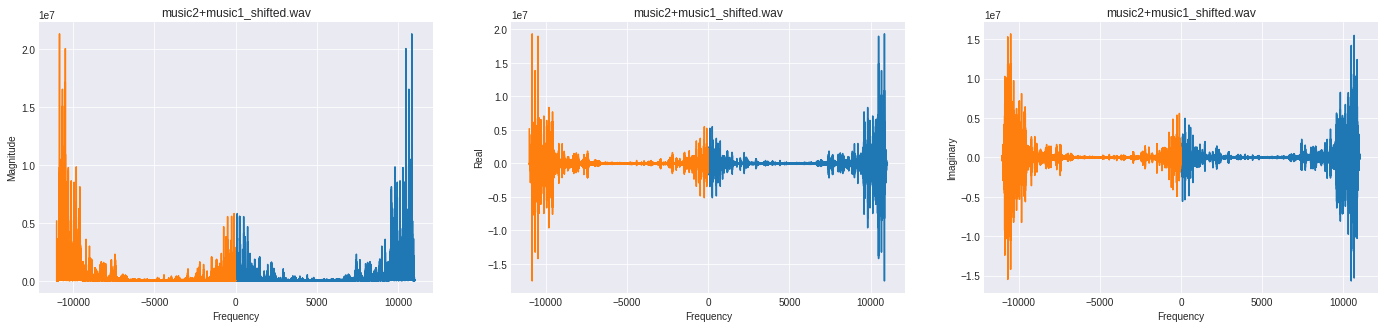

In [11]:
yf = yf1_shifted + yf2
fig, axes = plt.subplots(figsize=(24,5), nrows=1, ncols=3)
plot_freq_domain(xf1, yf, axes, 'music2+music1_shifted.wav')
plt.show()

In [12]:
data = ifft(yf)
wavfile.write("music2+music1_shifted.wav", sample_rate1, data.astype(np.int16))

In [13]:
Audio('music2+music1_shifted.wav')


  <div dir=rtl id="intro">
  <font face="XB Zar" size=4>
در نمودارها می‌توانید ببینید که جمع در حوزه فرکانس به درستی انجام گرفته است. وقتی به حوزه زمان برمی‌گردانیم‌، می‌بینیم که تنها فایل دوم شنیده می‌شود. البته صدای سوتی هم بخاطر وجود فرکانس‌های بالا ممکن است بشنوید.
برای کمتر کردن صدای سوت، باید فایل اول را 
resample
می‌کردیم که فرکانس‌های بالاتر هم داشته باشد، بعد با شیفت فرکانسی به آن فرکانس‌های بالا تاثیر سوت کم می‌شد.
</font>
</div>

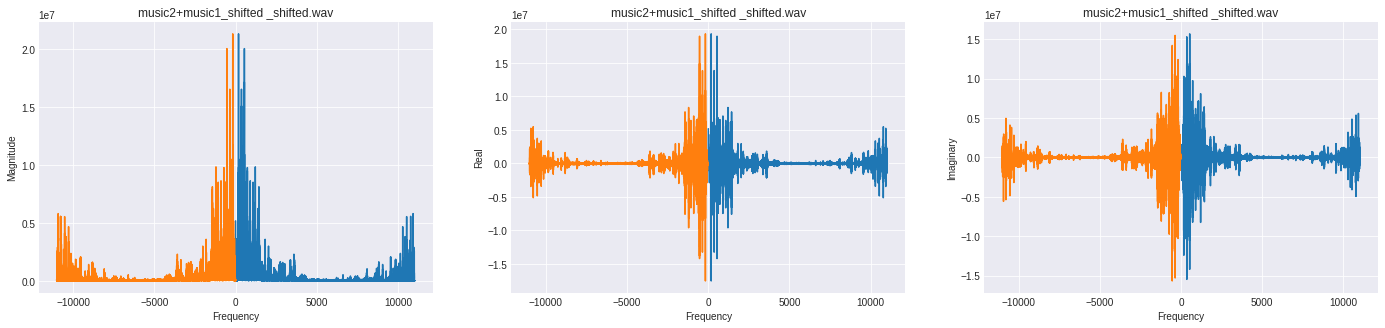

In [14]:
yf_shifted = fftshift(yf)
fig, axes = plt.subplots(figsize=(24,5), nrows=1, ncols=3)
plot_freq_domain(xf1, yf_shifted, axes, 'music2+music1_shifted _shifted.wav')
plt.show()

In [15]:
data_shifted = ifft(yf_shifted)
wavfile.write("music2+music1_shifted _shifted.wav", sample_rate1, data_shifted.astype(np.int16))

In [16]:
Audio('music2+music1_shifted _shifted.wav')


  <div dir=rtl id="intro">
  <font face="XB Zar" size=4>
این بار صدای مرغ سحر یعنی فایل اول پخش می‌شود. همانطور که گفتیم دلیل این امر به این خاطر است که محدوده شنوایی ما در بازه فرکانسی مشخصی است، و تنها وقتی موسیقی در آن بازه هست می‌شنویم. همچنین دقت کنید که از ابتدا فرکانس نمونه‌برداری دو فایل یکسان بود، بنابراین لازم نبود فرکانس نمونه‌برداری را یکی کنیم.
</font>
</div>

<div dir=rtl>
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        سوال دوم
      </font>
      <hr />
      <font color="red" size=4>
        ۱.
      </font>
      معکوس تبدیل می‌شود
      <center>
$x[n]=\frac{1}{N}\sum_{k=0}^{N-1}X[k]e^{j\frac{2\pi}{N}kn}$
</center>
<font color="red" size=4>
        ۲.
      </font>

</font>
</div>

In [17]:
def my_fft(x, N):
    X = np.zeros(N)
    for k in tqdm(range(N)):
        for n in range(N):
            X[k] += x[n] * np.exp(-1j * 2*np.pi*k*n / N)
    return X
x = np.array([1, 0])
N = len(x)
my_fft(x, N)

100%|██████████| 2/2 [00:00<00:00, 6278.90it/s]


array([1., 1.])

<div dir=rtl>
  <font face="XB Zar" size=4>
<font color="red" size=4>
        ۳.
      </font>

</font>
</div>

In [18]:
def my_ifft(X, N):
    x = np.zeros(N)
    for n in tqdm(range(N)):
        for k in range(N):
            x[n] += X[k] * np.exp(1j * 2*np.pi*k*n / N)
        x[n] = x[n] / N
    return x
X = np.array([1, 1])
N = len(X)
my_ifft(X, N)

100%|██████████| 2/2 [00:00<00:00, 3629.86it/s]


array([1., 0.])

<div dir=rtl>
  <font face="XB Zar" size=4>
<font color="red" size=4>
        ۴.
      </font>

</font>
</div>

In [19]:
def cos(T, samples_range):
    N = len(samples_range)
    x = np.zeros(N)
    for n in range(N):
        x[n] = np.cos(np.pi * T * samples_range[n])
    return x

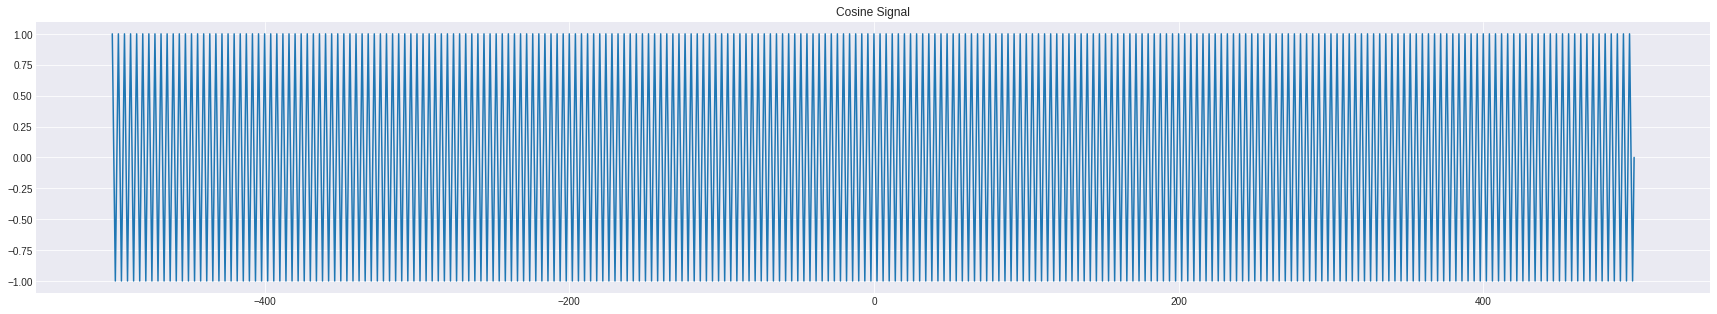

In [20]:
T = 1/2
samples_range = np.arange(-500, 500, 1.0)
x = cos(T, samples_range)
fig, axe = plt.subplots(figsize=(30,5), nrows=1, ncols=1)
axe.plot(samples_range, x)
axe.set_title("Cosine Signal")
plt.show()

<div dir=rtl>
  <font face="XB Zar" size=4>
<font color="red" size=4>
        ۵.
      </font>

</font>
</div>

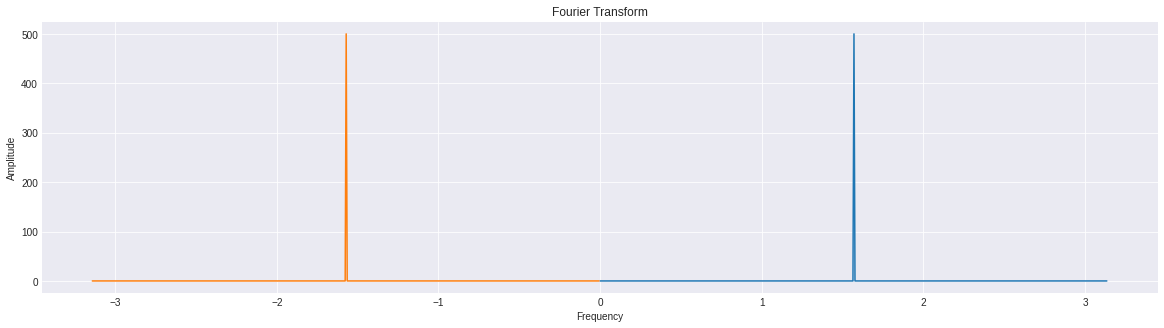

In [21]:
X = fft(x)
amp = np.abs(X)
xf = fftfreq(x.shape[0], 0.5 / np.pi)

fig, axe = plt.subplots(figsize=(20,5))
axe.plot(xf[:x.shape[0]//2], amp[:x.shape[0]//2])
axe.plot(xf[x.shape[0]//2:], amp[x.shape[0]//2:])
axe.set_title('Fourier Transform')
axe.set_ylabel('Amplitude')
axe.set_xlabel("Frequency")
plt.show()

<div dir=rtl>
  <font face="XB Zar" size=4>
<font color="red" size=4>
        ۶.
      </font>

</font>
</div>

100%|██████████| 1000/1000 [00:08<00:00, 116.71it/s]


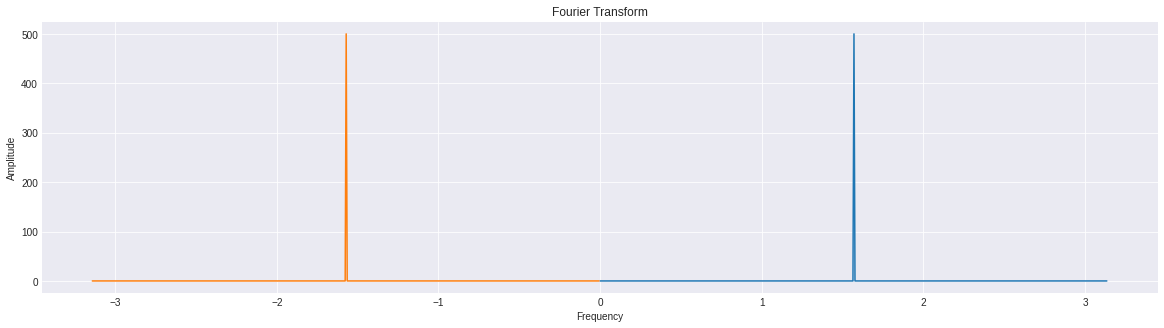

In [22]:
my_X = my_fft(x, len(x))
my_amp = np.abs(my_X)

fig, axe = plt.subplots(figsize=(20,5))
axe.plot(xf[:x.shape[0]//2], my_amp[:x.shape[0]//2])
axe.plot(xf[x.shape[0]//2:], my_amp[x.shape[0]//2:])
axe.set_title('Fourier Transform')
axe.set_ylabel('Amplitude')
axe.set_xlabel("Frequency")
plt.show()

<div dir=rtl>
  <font face="XB Zar" size=4>
  همانطور که می‌بینید نتیجه مشابه قسمت ۵ شده و تنها مدت زمان اجرا بیشتر است. همچنین دقت کنید که تبدیل فوریه کسینوس دو تابع دلتا می‌شود که در شکل هم به همین ترتیب است.
  <br>
<font color="red" size=4>
        ۷.
      </font>

</font>
</div>

100%|██████████| 1000/1000 [00:08<00:00, 118.46it/s]


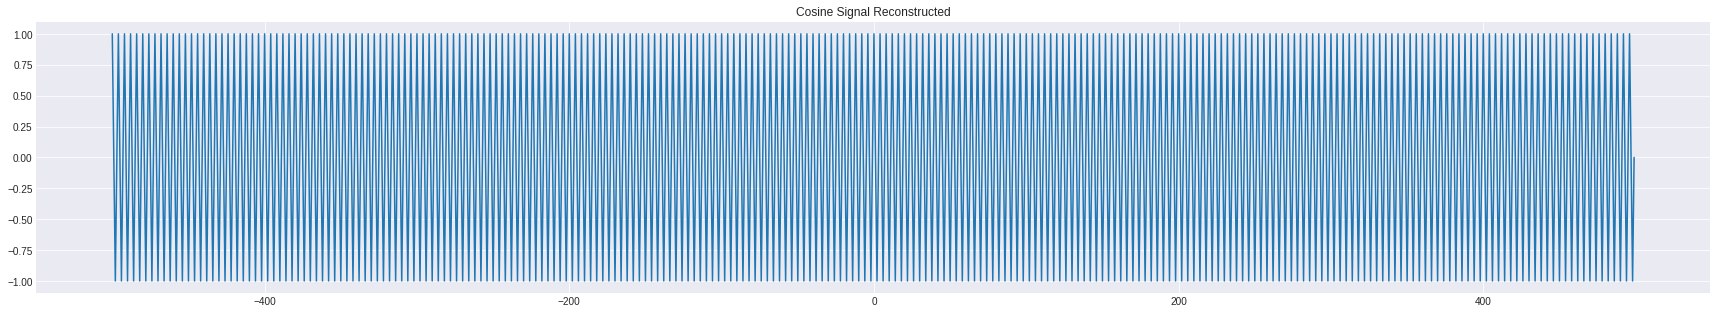

In [23]:
my_x = my_ifft(my_X, len(my_X))


fig, axe = plt.subplots(figsize=(30,5), nrows=1, ncols=1)
axe.plot(samples_range, my_x)
axe.set_title("Cosine Signal Reconstructed")
plt.show()

In [24]:
np.sum(x - my_x)

2.185050199076938e-12

<div dir=rtl>
  <font face="XB Zar" size=4>
  همانطور که می‌بینید بردار نهایی با تقریب خوبی همان بردار اولی است. این اختلاف اندک هم بخاطر خطای محاسبات نامپای می‌باشد.
  <br>
<font color="red" size=4>
        ۸.
      </font>

</font>
</div>

In [25]:
def plot(T, samples_range):
    x = cos(T, samples_range)
    xf = fftfreq(x.shape[0], 0.5 / np.pi )
    my_X = my_fft(x, len(x))
    my_amp = np.abs(my_X)

    fig, axe = plt.subplots(figsize=(20,5))
    axe.plot(xf[:x.shape[0]//2], my_amp[:x.shape[0]//2])
    axe.plot(xf[x.shape[0]//2:], my_amp[x.shape[0]//2:])
    axe.set_title('Fourier Transform')
    axe.set_ylabel('Amplitude')
    axe.set_xlabel("Frequency")
    plt.show()

100%|██████████| 1000/1000 [00:08<00:00, 123.91it/s]


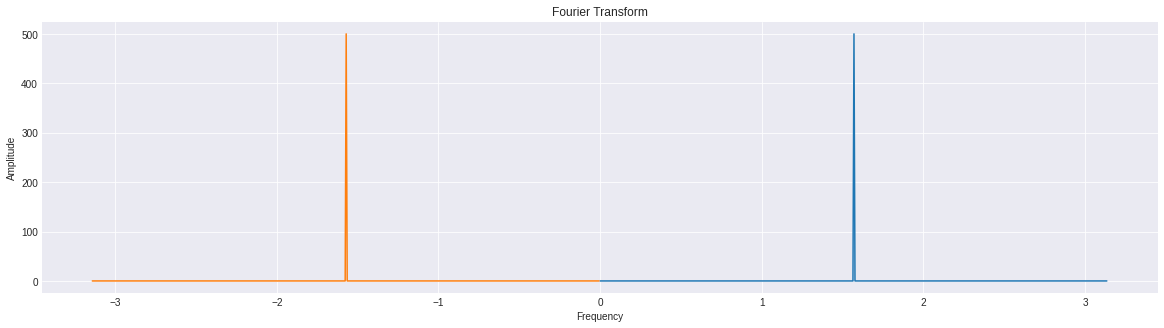

In [26]:
T = 1/2
samples_range = np.arange(-500, 500, 1.0)
plot(T, samples_range)

100%|██████████| 1000/1000 [00:08<00:00, 122.93it/s]


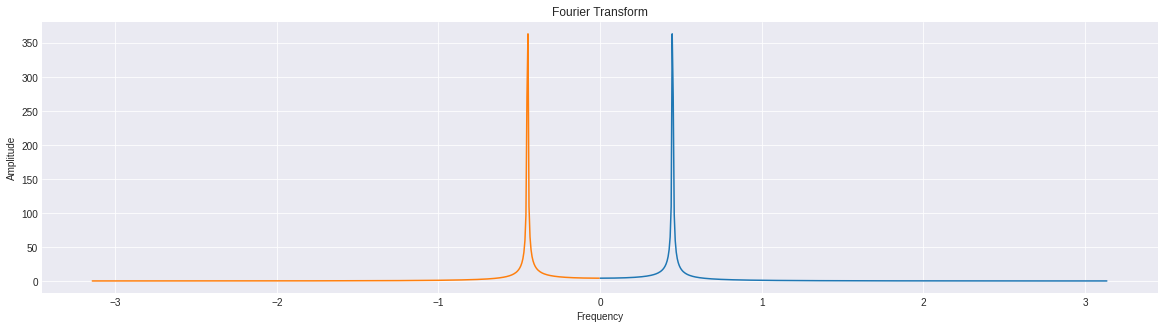

In [27]:
T = 1/7
samples_range = np.arange(-500, 500, 1.0)
plot(T, samples_range)

100%|██████████| 4000/4000 [02:06<00:00, 31.72it/s]


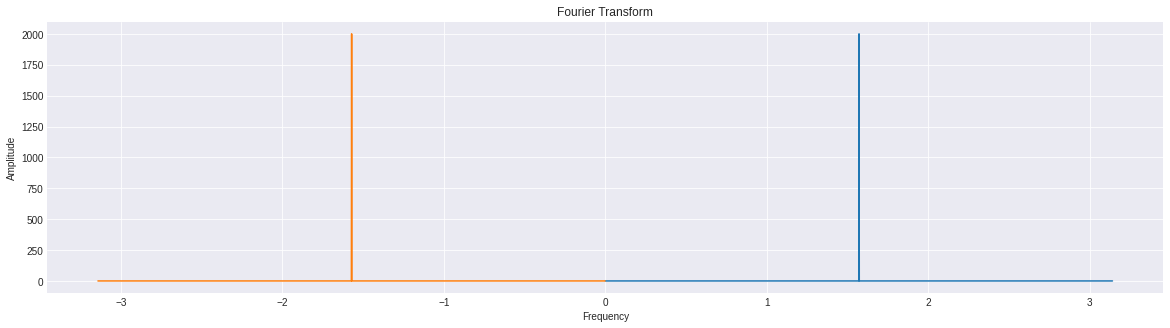

In [28]:
T = 1/2
samples_range = np.arange(-2000, 2000, 1.0)
plot(T, samples_range)

100%|██████████| 4000/4000 [02:10<00:00, 30.69it/s]


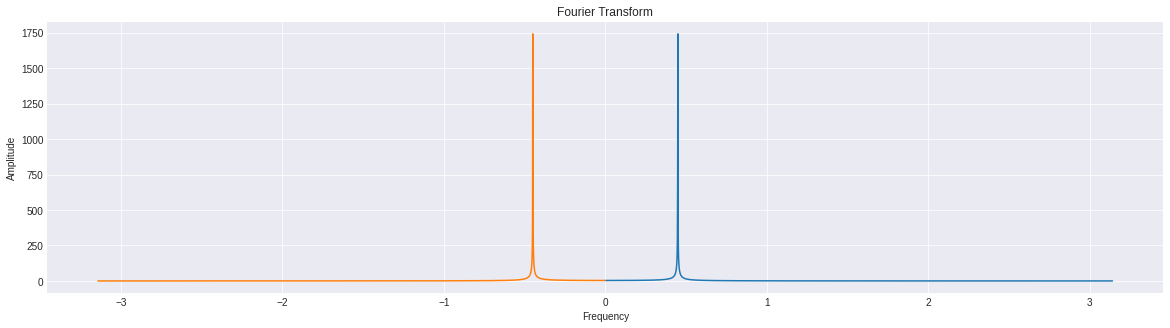

In [29]:
T = 1/7
samples_range = np.arange(-2000, 2000, 1.0)
plot(T, samples_range)

100%|██████████| 1000/1000 [00:07<00:00, 127.29it/s]


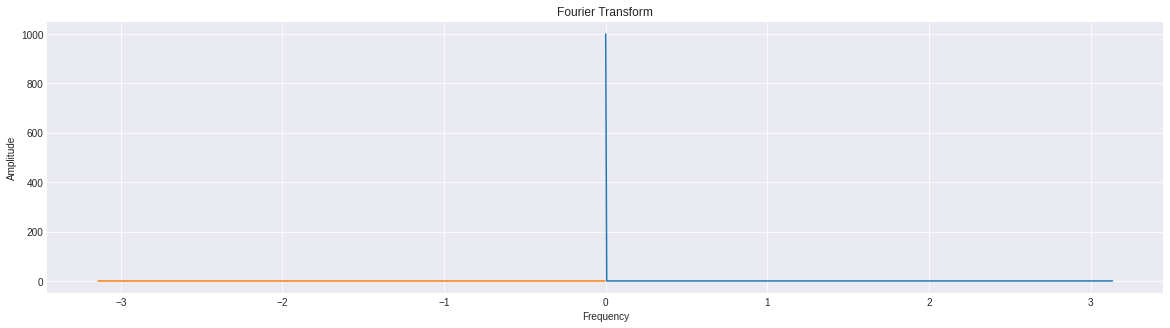

In [30]:
T = 10
samples_range = np.arange(-500, 500, 1)
plot(T, samples_range)

<div dir=rtl>
  <font face="XB Zar" size=4>
همانطور که در نمودارها مشخص است، با زیاد شدن نمونه‌‌ها خروجی بیشتر شبیه دلتا می‌شود. یعنی دامنه‌اش بزرگتر شده و سریعتر رشد می‌کند. زیاد شدن 
$T$
هم تاثیر مشابه دارد. همچنین دقت کنید که با توجه به تبدیل فوریه، این دو تابع دیراک در دو نقطه
$\pm \pi T$
هستند که در نمودارها هم مشخص است. نمودار آخر هم ورودی ثابت ۱ است بنابراین خروجی به درستی دلتا شده است.
</font>
</div>

<div dir=rtl id="intro">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        سوال سوم
      </font>
      <hr />
        <font face="XB Zar" size=4>
برای به دست آوردن پاسخ فرکانسی از رابطه
$Y(j\omega ) = H(j\omega )X(j\omega)$
استفاده می‌کنیم. ابتدا به کمک ورودی و خروجی اول پاسخ فرکانسی را به دست آورده و از روی آن و خروجی دوم، ورودی دوم را حساب می‌کنیم.
</font>
</div>
</font>
</div>

In [31]:
Audio('clean1.wav')

In [32]:
Audio('distorted1.wav')

In [33]:
Audio('distorted2.wav')

In [34]:
sr_clean1, data_clean1 = wavfile.read("clean1.wav") 
sr_distorted1, data_distorted1 = wavfile.read("distorted1.wav") 
sr_distorted2, data_distorted2 = wavfile.read("distorted2.wav")
length_clean1 = data_clean1.shape[0] / sr_clean1
length_distorted1 = data_distorted1.shape[0] / sr_distorted1
length_distorted2 = data_distorted2.shape[0] / sr_distorted2
print(f"'clean1.wav' Sample rate: {sr_clean1}", end=' ')
print(f"Samples: {data_clean1.shape[0]}", end=' ')
print(f"Length: {length_clean1}s")
print(f"'distorted1.wav' Sample rate: {sr_distorted1}", end= ' ')
print(f"Samples: {data_distorted1.shape[0]}", end=' ')
print(f"Length: {length_distorted1}s")
print(f"'distorted2.wav' Sample rate: {sr_distorted2}", end= ' ')
print(f"Samples: {data_distorted2.shape[0]}", end=' ')
print(f"Length: {length_distorted2}s")
data_clean1, data_distorted1, data_distorted2

'clean1.wav' Sample rate: 8000 Samples: 16998 Length: 2.12475s
'distorted1.wav' Sample rate: 8000 Samples: 16998 Length: 2.12475s
'distorted2.wav' Sample rate: 8000 Samples: 22937 Length: 2.867125s


(array([41, 61, 12, ...,  8, 12, 12], dtype=int16),
 array([ 5, 11,  7, ..., 27, 27, 25], dtype=int16),
 array([ 0,  0,  0, ...,  1, -5, -3], dtype=int16))

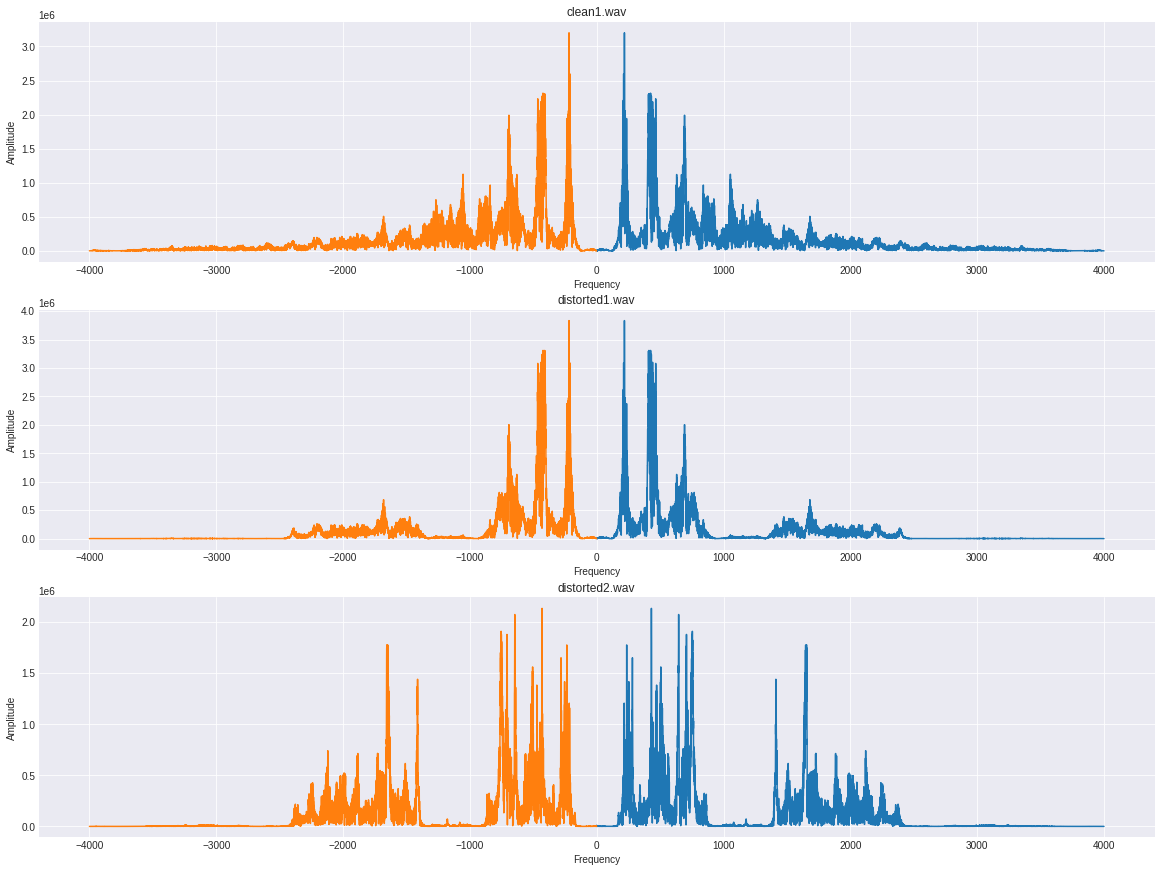

In [43]:
yf_clean1 = fft(data_clean1)
amp_clean1 = np.abs(yf_clean1)
xf_clean1 = fftfreq(data_clean1.shape[0], 1 / sr_clean1)
yf_distorted1 = fft(data_distorted1)
amp_distorted1 = np.abs(yf_distorted1)
xf_distorted1 = fftfreq(data_distorted1.shape[0], 1 / sr_distorted1)
yf_distorted2 = fft(data_distorted2)
amp_distorted2 = np.abs(yf_distorted2)
xf_distorted2 = fftfreq(data_distorted2.shape[0], 1 / sr_distorted2)


fig, axes = plt.subplots(figsize=(20,15), nrows=3, ncols=1)
axes[0].plot(xf_clean1[:data_clean1.shape[0]//2], amp_clean1[:data_clean1.shape[0]//2])
axes[0].plot(xf_clean1[data_clean1.shape[0]//2:], amp_clean1[data_clean1.shape[0]//2:])
axes[0].set_title('clean1.wav')
axes[0].set_ylabel('Amplitude')
axes[0].set_xlabel("Frequency")
axes[1].plot(xf_distorted1[:data_distorted1.shape[0]//2], amp_distorted1[:data_distorted1.shape[0]//2])
axes[1].plot(xf_distorted1[data_distorted1.shape[0]//2:], amp_distorted1[data_distorted1.shape[0]//2:])
axes[1].set_title('distorted1.wav')
axes[1].set_ylabel('Amplitude')
axes[1].set_xlabel("Frequency")
axes[2].plot(xf_distorted2[:data_distorted2.shape[0]//2], amp_distorted2[:data_distorted2.shape[0]//2])
axes[2].plot(xf_distorted2[data_distorted2.shape[0]//2+1:], amp_distorted2[data_distorted2.shape[0]//2+1:])
axes[2].set_title('distorted2.wav')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlabel("Frequency")
plt.show()

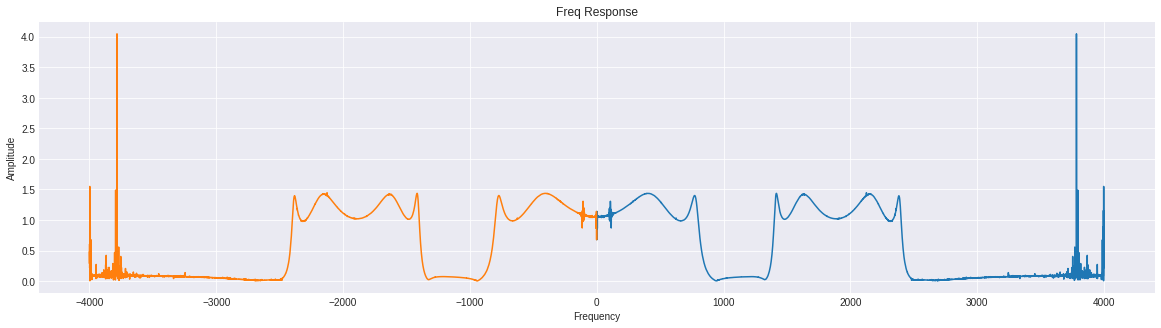

In [44]:
freq_response = yf_distorted1 / yf_clean1
amp_freq_response = np.abs(freq_response)


fig, axe = plt.subplots(figsize=(20,5))
axe.plot(xf_clean1[:data_clean1.shape[0]//2], amp_freq_response[:data_clean1.shape[0]//2])
axe.plot(xf_clean1[data_clean1.shape[0]//2:], amp_freq_response[data_clean1.shape[0]//2:])
axe.set_title('Freq Response')
axe.set_ylabel('Amplitude')
axe.set_xlabel("Frequency")
plt.show()

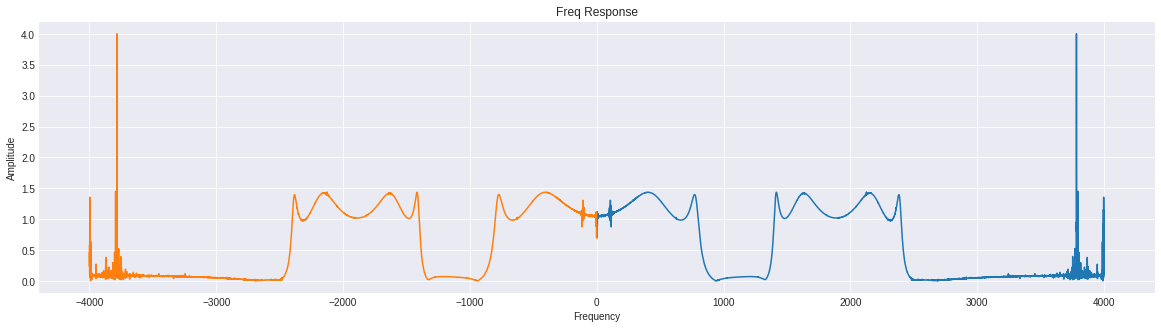

In [45]:
freq_response = signal.resample(freq_response , data_distorted2.shape[0])
amp_freq_response = np.abs(freq_response)


fig, axe = plt.subplots(figsize=(20,5))
axe.plot(xf_distorted2[:data_distorted2.shape[0]//2], amp_freq_response[:data_distorted2.shape[0]//2])
axe.plot(xf_distorted2[data_distorted2.shape[0]//2+1:], amp_freq_response[data_distorted2.shape[0]//2+1:])
axe.set_title('Freq Response')
axe.set_ylabel('Amplitude')
axe.set_xlabel("Frequency")
plt.show()

In [46]:
yf_recovered2 = yf_distorted2 / freq_response
data_recovered2 = ifft(yf_recovered2)

In [47]:
wavfile.write("recovered2.wav", sr_distorted2, data_recovered2.astype(np.int16))

In [48]:
Audio('recovered2.wav')


  <div dir=rtl>
  <font face="XB Zar" size=4>
دقت کنید که چون سمپل‌های دو حالت برابر نیست، پاسخ فرکانسی را resample
کرده‌ایم. در انتها می‌توانید صدای ورودی دوم را گوش دهید. صدای بوقی هم ممکن است بشنوید، که باز هم بخاطر خطای محاسباتی هنگام تقسیم است.
</font>
</div>

<div dir=rtl id="intro">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        سوال چهارم
      </font>
      <hr />
</font>
</div>


  <div dir=rtl id="intro">
  <font face="XB Zar" size=4>
به صورت معمول نویز در تمام فرکانس‌ها وجود دارد، در حالی که سیگنال اصلی bandlimited
است.
از این نکته استفاده می‌کنیم و فرکانس‌های مربوط به سیگنال اصلی را با یک فیلتر جدا می‌کنیم.
برای اینکار ابتدا دامنه سیگنال در حوزه فرکانس را رسم می‌کنیم. فرکانس‌های با دامنه بالاتر احتمالا مربوط به سیگنال اصلی هستند.
</font>
</div>

In [49]:
Audio('noisy1.wav')

In [50]:
sr_noisy, data_noisy = wavfile.read("noisy1.wav")
N = data_noisy.shape[0]
length = N / sr_noisy
print(f"Sample rate: {sr_noisy}", end=' ')
print(f"Samples: {N}", end=' ')
print(f"Length: {length}s")

Sample rate: 22050 Samples: 400000 Length: 18.140589569160998s


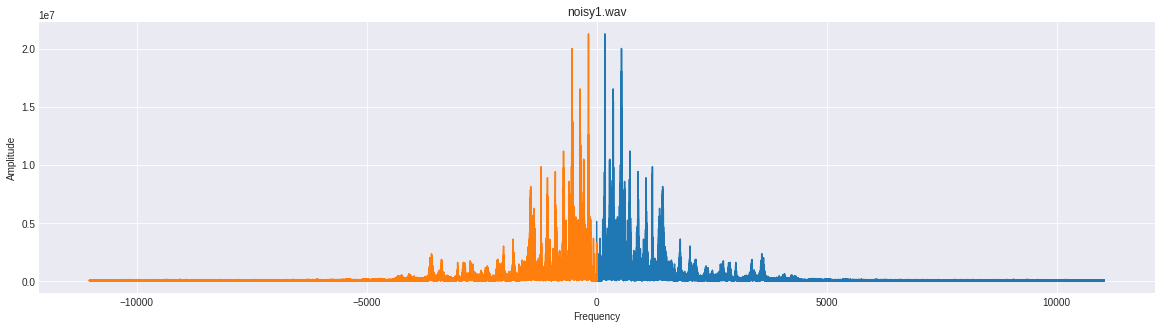

In [52]:
yf = fft(data_noisy)
amp = np.abs(yf)
xf = fftfreq(N, 1 / sr_noisy)

fig, axe = plt.subplots(figsize=(20,5))
axe.plot(xf[:N//2], amp[:N//2])
axe.plot(xf[N//2:], amp[N//2:])
axe.set_title('noisy1.wav')
axe.set_ylabel('Amplitude')
axe.set_xlabel("Frequency")
plt.show()

In [53]:
max_amplitude = np.max(amp)
th = 0.12
print(f'Max Amplitude: {max_amplitude} Threshold: {th*max_amplitude}')
first , last = None , None
for i in range(N):
    if (amp[i] > th * max_amplitude and xf[i] >= 0):
        if first == None:
            first = i
        last = i
print(xf[first], xf[last])

Max Amplitude: 21266842.875382897 Threshold: 2552021.1450459473
0.0 2024.906625


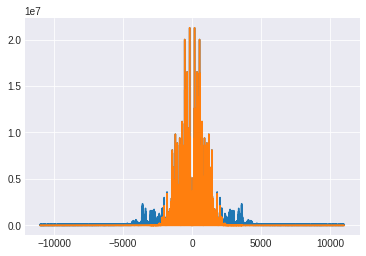

In [55]:
wc = xf[last] * 2 / sr_noisy
sos = signal.butter(10, wc, btype='lowpass', output="sos")
filtered = signal.sosfilt(sos, data_noisy)


yf_filtered = fft(filtered)

plt.plot(xf, np.abs(yf))
plt.plot(xf, np.abs(yf_filtered))
plt.show()

In [56]:
wavfile.write("denoised1.wav" , sr_noisy, filtered.astype(np.int16))

In [57]:
Audio("denoised1.wav")


  <div dir=rtl id="intro">
  <font face="XB Zar" size=4>
همانطور که می‌بینید، بر اساس بیشترین دامنه موجود در فرکانس یک فیلتر lowpass
طراحی کرده‌ایم. در نمودار نهایی می‌بینید که فیلتر به درستی فرکانس‌های بزرگ را فیلتر کرده است. می‌توانید مقدار th
را تغییر دهید. با زیاد کردن آن نویز کمتر شده، ولی سیگنال اصلی هم از دست می‌رود. با کم شدن آن نویز بیشتر شده اما سیگنال اصلی باقی می‌ماند.
</font>
</div>

<div dir=rtl id="intro">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        سوال پنجم
      </font>
     <hr />
</font>
</div>

In [58]:
# requires coefficients of the numerator and denominator polynomials
# the coefficients are given starting with the highest power of s

G = control.tf([1,2,10],[1,0,25+1.9*10**6,10])
print(G)


   s^2 + 2 s + 10
--------------------
s^3 + 1.9e+06 s + 10



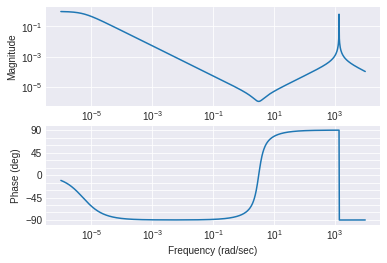

In [59]:
mag, phase, omega = control.bode(G)

In [60]:
zeros = control.zeros(G)
poles = control.poles(G)
print('Zeros: ', zeros)
print('Poles: ', poles)

Zeros:  [-1.+3.j -1.-3.j]
Poles:  [ 2.63154432e-06+1378.41394363j  2.63154432e-06-1378.41394363j
 -5.26308864e-06   +0.j        ]


(array([ 2.63154432e-06+1378.41394363j,  2.63154432e-06-1378.41394363j,
        -5.26308864e-06   +0.j        ]), array([-1.+3.j, -1.-3.j]))

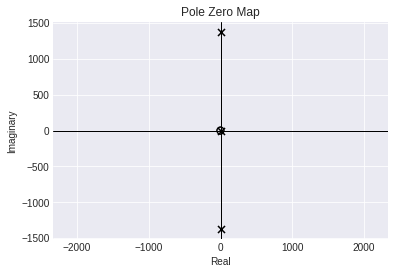

In [61]:
control.pzmap(G)


  <div dir=rtl id="intro">
  <font face="XB Zar" size=4>
در ابتدا دو نمودار دامنه و فاز پاسخ فرکانسی داده شده را می‌بینید. در ادامه صفرها و قطب‌های تابع محاسبه و رسم شده‌اند. دقت کنید که چون صورت درجه ۲ و مخرج درجه ۳ است، پس ۲ صفر و ۳ قطب داریم. همچنین با توجه به خواص چندجمله‌ای‌ها، اگر z
ریشه باشد
$\overline{z}$
هم ریشه است.
در ادامه بدون استفاده از پکیج control
دو نمودار اولی را رسم می‌کنیم.
</font>
</div>

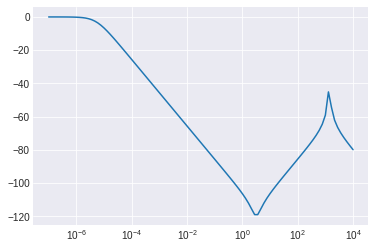

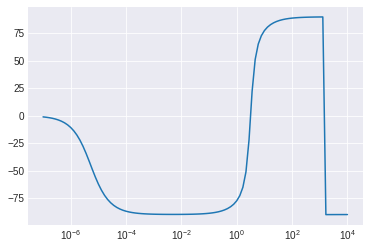

In [62]:
sys = signal.TransferFunction([1,2,10],[1,0,25+1.9*10**6,10])
w, mag, phase = signal.bode(sys)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()